**Capstone Project :**
**`FindDefault (Prediction of Credit Card fraud)`**


**Problem Statement:**

Credit card are most used for online purchases and payments, but Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.
The  Main goal of the project is to predict the fraudulent credit card transaction by using machine learning models.

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.


**Tasks Listed below**

**Task 1:** Collect the time series data from the CSV file linked here.

**Task 2:** Exploratory Data Analysis (EDA) - Show the Data quality check, treat the missing values, outliers etc if any.

**Task 3:** Get the correct datatype for date.

**Task 4:** Balancing the data.

**Task 5:** Feature Engineering and feature selection.

**Task 6:**Train/Test Split - Apply a sampling distribution to find the best split.

**Task 7:** Choose the metrics for the model evaluation

**Task 8:** Model Selection, Training, Predicting and Assessment

**Task 9:** Hyperparameter Tuning/Model Improvement

**Task 10:** Model deployment plan.


#Collect the time series data from the CSV file linked here.

**Importing Required Libraries**


In [49]:
# import the Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import show
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as Pyplot

from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import norm
from scipy.stats import shapiro
import sklearn.metrics as metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score, precision_score, recall_score, confusion_matrix, classification_report, roc_curve,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,validation_curve, StratifiedShuffleSplit,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.datasets import make_classification


from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn import over_sampling

**Load the Dataset from github**

In [50]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [51]:
url = 'creditcard.csv'
creditcard = pd.read_csv(url)

#Task 2: Exploratory Data Analysis (EDA)

In EDA below mentioned steps will be done

1.Data Cleaning

2.Descriptive Statistics

3.Visualize data relationship

4.Feature Engineering

In [52]:
#Analysing the dataset
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [53]:
#Analysing the dataset
creditcard.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [54]:
#Analysing Number af Rows and columns in the given dataset
creditcard.shape

(284807, 31)

It has 284807 Rows and 31 columns

In [55]:
#To load the information of the dataset
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#Visualization of the Dataset

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

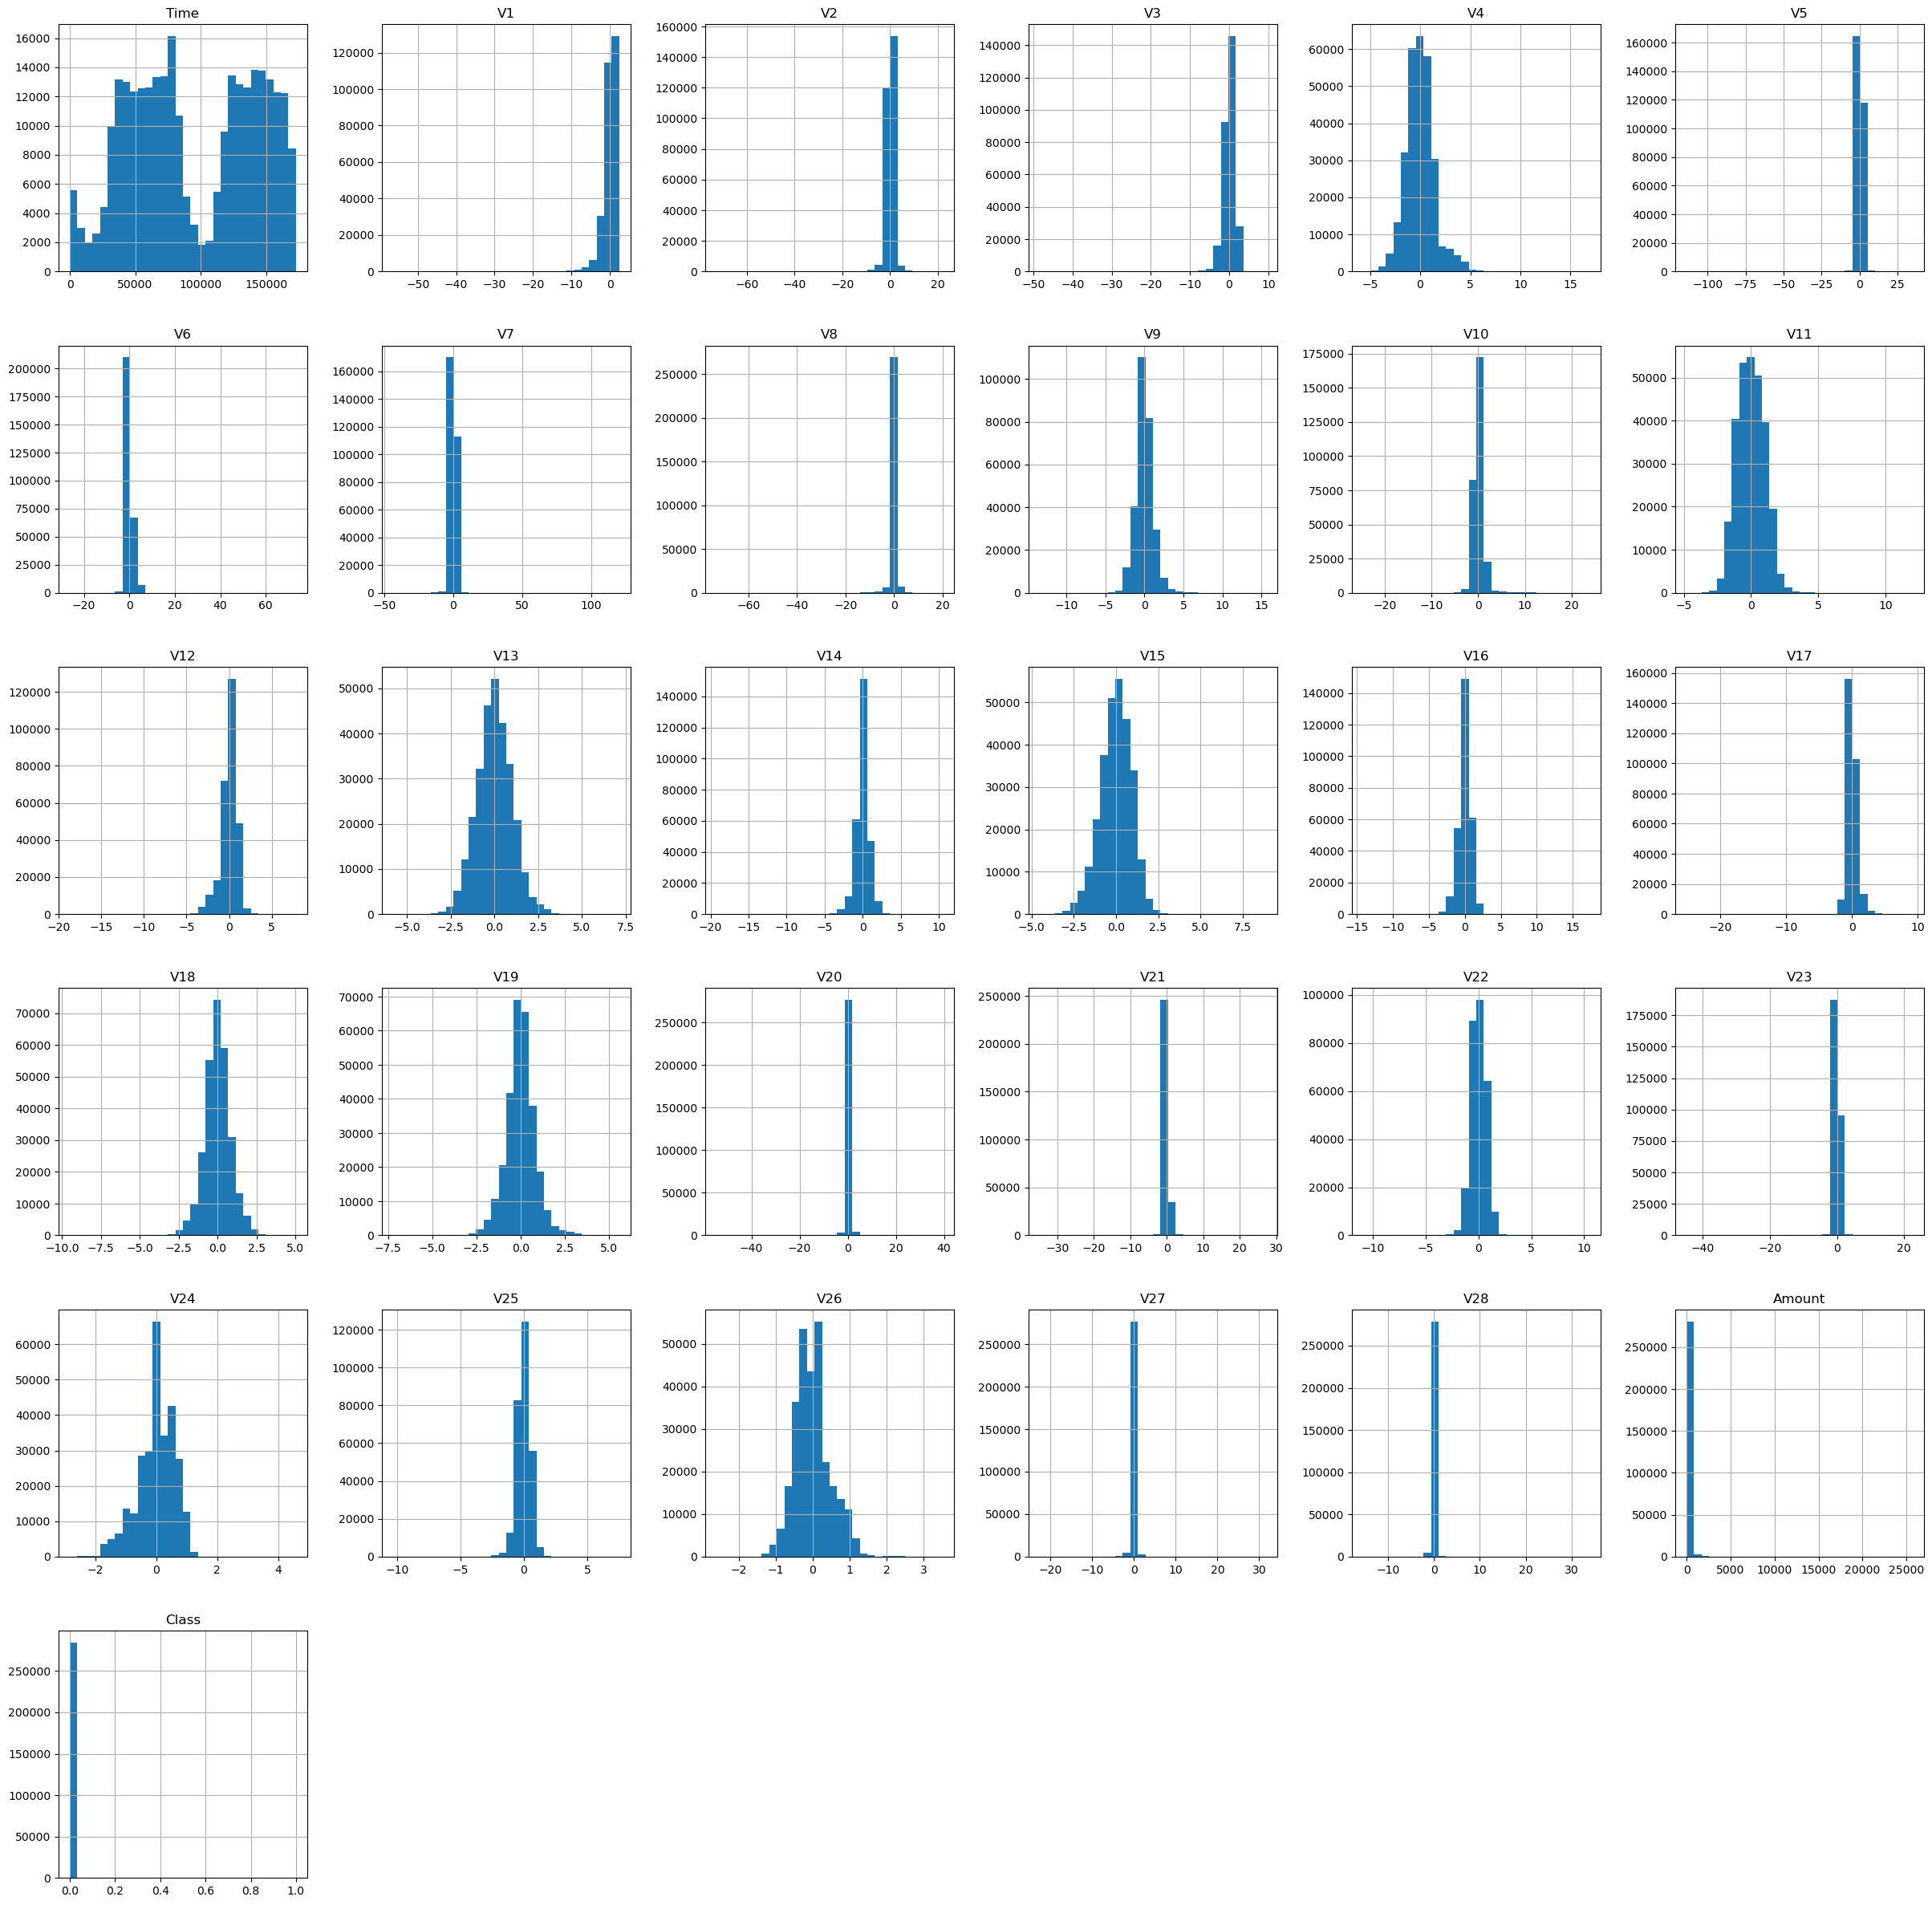

In [56]:
creditcard.hist(bins=30, figsize=(30,30))

In [57]:
creditcard.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.759061e-12,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,-8.251130e-13,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-9.654937e-13,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,8.321385e-13,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.649999e-13,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,4.248366e-13,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-3.054600e-13,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,8.777971e-14,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-1.179749e-12,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


**Check for Missing Values**

In [58]:
# identifing the missing values(percentage) in columns
missing_values = (round(((creditcard.isnull().sum()/len(creditcard.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
missing_values

,null
Time,0.0
V16,0.0
Amount,0.0
V28,0.0
V27,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0


**Note:**
Hence there is no missing values found in the dataset, No need to worry about missing values

**Analyze distribution of numerical features and Categorical Features**

In [59]:
def data_features (data):
    categorical_data= creditcard.select_dtypes(exclude = [np.number]).columns
    numerical_data = creditcard.select_dtypes(include = [np.number]).columns
    print("Categorical features in  creditcard file :\n",categorical_data);
    print("Numerical features in  creditcard file   :\n",numerical_data);

print(data_features(creditcard))

Categorical features in  creditcard file :
 Index([], dtype='object')
Numerical features in  creditcard file   :
 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
None


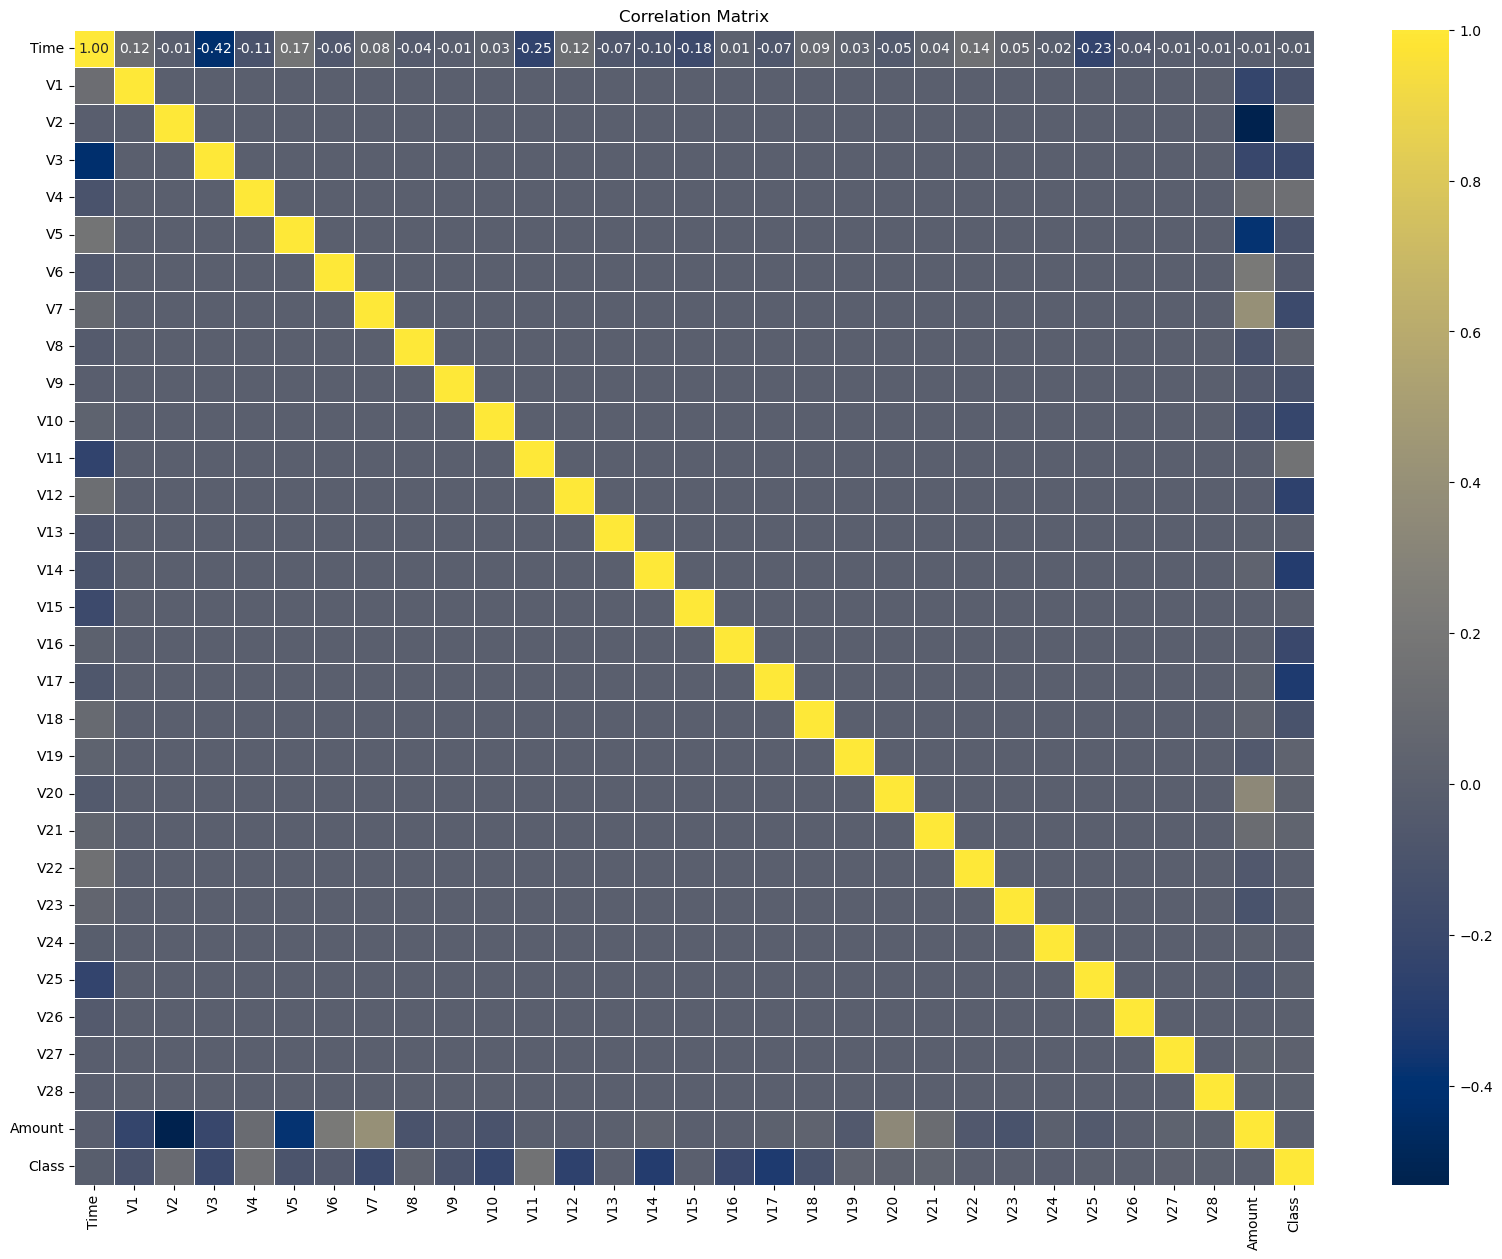

In [60]:
# Analyze correlations between features (heatmaps)
plt.figure(figsize=(20, 15))
correlation = creditcard.corr()
sns.heatmap(correlation, annot=True, cmap='cividis', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()



**Analysing Imblance in dataset**

In [61]:
# Analyze target variable distribution (class imbalance)
fraud_count = len(creditcard[creditcard["Class"] == 1])
total_count = len(creditcard)
percentage = (fraud_count / total_count) * 100
print(f"Percentage of Fraudulent Transactions: {percentage:.2f}%")

Percentage of Fraudulent Transactions: 0.17%


In [62]:

creditcard.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

**Checking the distribution of the classes**

In [63]:
classes = creditcard['Class'].value_counts()
classes

Class
0    284315
1       492
Name: count, dtype: int64

In [64]:
normal_share = round((classes[0]/creditcard['Class'].count()*100),2)
print("Normal creditcard Transaction ", normal_share,'%')

Normal creditcard Transaction  99.83 %


In [65]:
fraud_share = round((classes[1]/creditcard['Class'].count()*100),2)
print("Fraud creditcard Transaction ", fraud_share,'%')

Fraud creditcard Transaction  0.17 %


**Visual Representation of the class column**

C:\Users\Hema\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


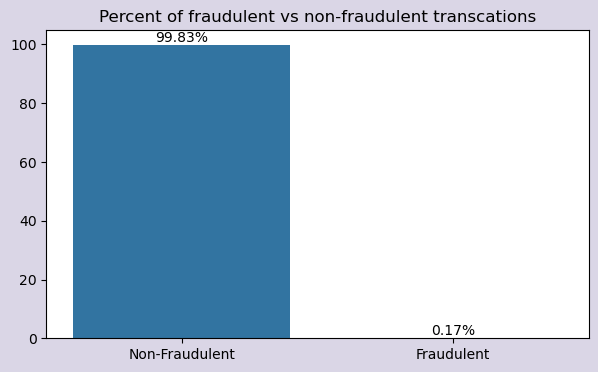

In [66]:
# Creating the barplot with seaborn
percent_fraud = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]}
percent_frauds = pd.DataFrame(percent_fraud)

#color and size of the barplot
fig = plt.figure(figsize=(7,4))
fig.set_facecolor("#dad6e6")

#Total credit card transaction in percentage
total = normal_share + fraud_share

ax = sns.barplot(x="Class", y='Percentage',  data=percent_fraud)
ax.set_title('Percent of fraudulent vs non-fraudulent transcations')
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
          height + 1,
          '{:1.2f}%'.format(height/total*100),
          ha="center")

#Set.title and save the figure
plt.title('Percent of fraudulent vs non-fraudulent transcations')
plt.savefig('percent_fraud.jpg')


**Outlier Management**

As all the columns are already PCA Transformed,We assume that ouliers are already managed while transforming the data So need to check the outliers for the given dataset.

**Track the class distribution over time:**

In [67]:
# Assigning fraudulent dataframe
data_fraud = creditcard[creditcard['Class'] == 1]
# Assiging non fraudulent dataframe
data_non_fraud = creditcard[creditcard['Class'] == 0]

C:\Users\Hema\AppData\Local\Temp\ipykernel_20924\3222243957.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_fraud['Time'],label='Fraudulent',hist=False)
C:\Users\Hema\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hema\AppData\Local\Temp\ipykernel_20924\3222243957.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a

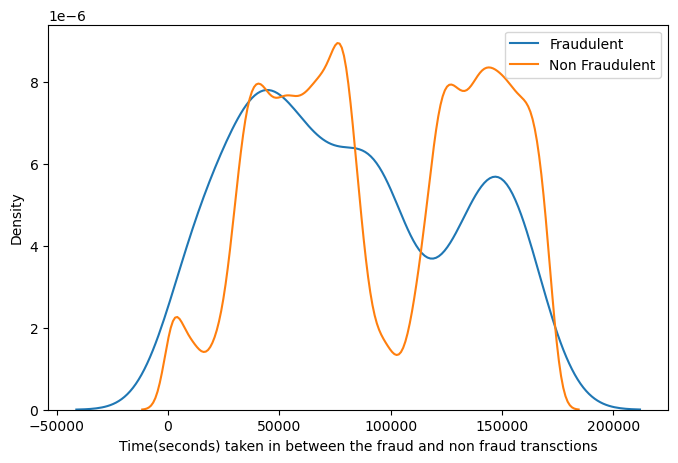

In [68]:
# Visual of plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='Fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='Non Fraudulent',hist=False)
ax.set(xlabel='Time(seconds) taken in between the fraud and non fraud transctions')
plt.legend()
plt.savefig('time_distrb.jpg')
plt.show()

##### Note
By analysing the fraudulent and non-fraudulent transctions with respect to Time.
Hence, There is no specific pattern for with respect to the time so we can drop the `Time` column.

**class distribution With Amount**

C:\Users\Hema\AppData\Local\Temp\ipykernel_20924\798849884.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_fraud['Amount'],label='Fraudulent',hist=False, color="#16e488" )
C:\Users\Hema\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hema\AppData\Local\Temp\ipykernel_20924\798849884.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use e

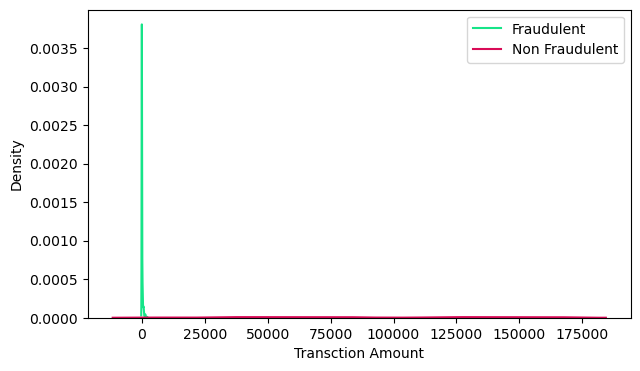

In [69]:
# Distribution plot
plt.figure(figsize=(7,4))
ax = sns.distplot(data_fraud['Amount'],label='Fraudulent',hist=False, color="#16e488" )
ax = sns.distplot(data_non_fraud['Time'],label='Non Fraudulent',  color= "#d90b57", hist=False)
ax.set(xlabel='Transction Amount')
plt.legend()
plt.savefig('amount_distrib.jpg')


**Analysis Note**

As from the above figure we can see that Fraudulent transaction are very high with the lower range of amount, also Non fraud transactions are spread from low range to high range of amount

#Analsying Time column

In [70]:
creditcard['Time'].describe()


count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [71]:
# Data is 48hours, and the values seems to represent the second will convert it to hours - 1hour =3600seconds

creditcard['Time'] =creditcard['Time']/3600

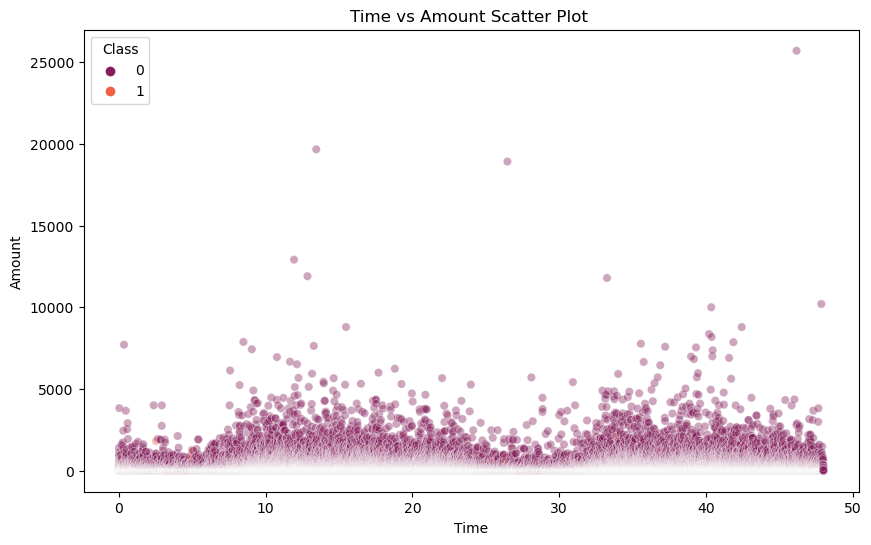

In [72]:
#Analysing Time and amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=creditcard, x='Time', y='Amount', hue='Class', palette='rocket', alpha=0.4)
plt.title('Time vs Amount Scatter Plot ')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend(title='Class')
plt.show()

Class = 0 Non-Fraudulent Transactions
Class = 1 Fraudulent Transactions


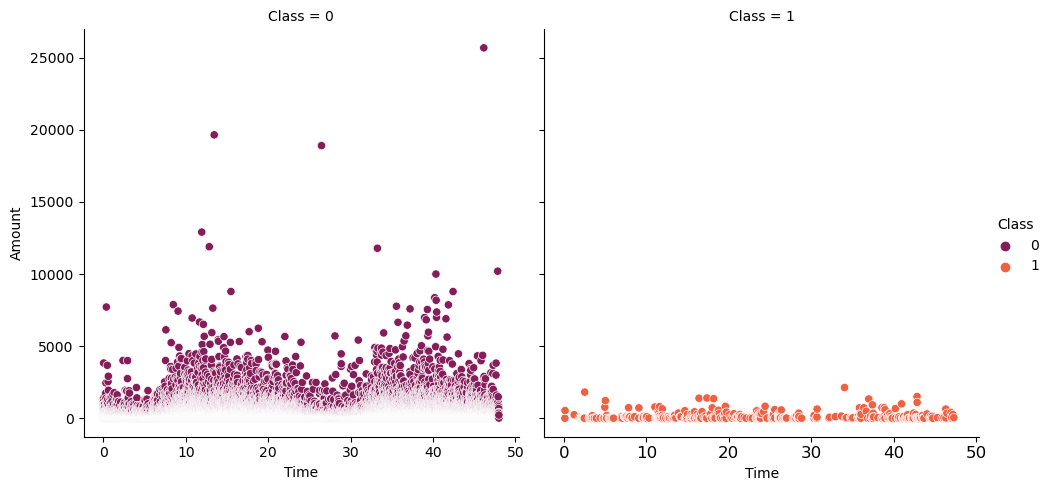

In [73]:
# Analysing the time vs. amount transaction between fraudulent and non-fraudulent
ax=sns.relplot(x="Time", y="Amount", col="Class", hue="Class",
                 kind="scatter", palette='rocket', data=creditcard)
plt.tick_params(labelsize=12)
print("Class = 0 Non-Fraudulent Transactions")
print("Class = 1 Fraudulent Transactions")

Analysis from above visuals:
Looking at the data, it appears that fraud amounts were below 2.2K. The pattern suggests fraudulent activity occurred between 2pm and 8pm on both days, with a possible spike again tonight around that time.

In [74]:
#Check the skewness and kurtosis
Non_Fraudulent= creditcard[creditcard["Class"] == 0]
print ("Non_Fraudulent:", Non_Fraudulent.shape);
Fraudulent= creditcard[creditcard["Class"] == 1]
print ("Fraudulent:", Fraudulent.shape);

Non_Fraudulent: (284315, 31)
Fraudulent: (492, 31)


In [75]:
#Non_Fraudulent: To evaluate Mean, Variance, skewness, and kurtosis
print ("Non_Fraudulent: To evaluate Mean, Variance, skewness, and kurtosis:")
a = Non_Fraudulent.mean(axis = 0, skipna = True)
b = Non_Fraudulent.var(axis = 0, skipna = True)
c = Non_Fraudulent.skew(axis = 0, skipna = True)
d = Non_Fraudulent.kurtosis(axis = 0, skipna = True)

a.index = b.index
a.index = c.index
a.index = d.index

data_Non_Fraudulent = pd.concat([a, b, c, d] ,axis = 1)
data_Non_Fraudulent.columns = ["Mean", "Var", "Skewness", "kurtosis"]
data_Non_Fraudulent = data_Non_Fraudulent.reset_index().rename(index=str, columns={"index": "Variables"})
print(data_Non_Fraudulent);



# Fraudulent = to check the skewness and kurtosis

print ("Fraudulent = To evaluate Mean, Variance, skewness, and kurtosis:")
print("")
e = Fraudulent.mean(axis = 0, skipna = True)
f = Fraudulent.var(axis = 0, skipna = True)
g = Fraudulent.skew(axis = 0, skipna = True)
h = Fraudulent.kurtosis(axis = 0, skipna = True)

e.index = f.index
e.index = g.index
e.index = h.index

data_Fraudulent = pd.concat([a, b, c, d] ,axis = 1)
data_Fraudulent.columns = ["Mean", "Var", "Skewness", "kurtosis"]
data_Fraudulent=data_Fraudulent.reset_index().rename(index=str, columns={"index": "Variables"})
print(data_Fraudulent);

Non_Fraudulent: To evaluate Mean, Variance, skewness, and kurtosis:
   Variables       Mean           Var   Skewness    kurtosis
0       Time  26.343945    173.976216  -0.036015   -1.293597
1         V1   0.008258      3.724182  -3.130188   31.065568
2         V2  -0.006271      2.676974  -4.887166   98.406211
3         V3   0.012171      2.129933  -1.453676   14.545345
4         V4  -0.007860      1.958134   0.581137    2.095716
5         V5   0.005453      1.841318  -2.213903  217.852170
6         V6   0.002419      1.768669   1.842604   42.987534
7         V7   0.009637      1.389598   4.747800  452.920870
8         V8  -0.000987      1.348579  -8.395492  209.772662
9         V9   0.004467      1.186731   0.665635    3.196847
10       V10   0.009824      1.090361   2.422278   21.961970
11       V11  -0.006576      1.006233   0.145537    0.035641
12       V12   0.010832      0.894801  -1.256301    5.300894
13       V13   0.000189      0.990157   0.065582    0.196578
14       V14   0.

**Analysis From Above task:**

**1.Skewness = 0 :** normally distributed. ; a zero value means that the tails on both sides of the mean balance out overall,

**2.Skewness > 0:** more weight in the left tail of the distribution.

**3.Skewness < 0:** more weight in the right tail of the distribution.
For example, a zero value means that the tails on both sides of the mean balance out overall;
 this is the case for asymmetric distribution, but it can also be true for an asymmetric distribution where one tail is long and thin, and the other is short but fat.

In [76]:
#Positive skewness for Non Fraudulent Transactions

print('Positive skewness for Non Fraudulent Transactions ')
left_skewness_Non_Fraudulent= data_Non_Fraudulent[data_Non_Fraudulent.Skewness >0]
print(left_skewness_Non_Fraudulent['Variables'].unique());


#Positive skewness for Fraudulent Transactions

print('Positive skewness for Fraudulent Transactions')
left_skewness_Fraudulent = data_Fraudulent[data_Fraudulent.Skewness >0]
print(left_skewness_Fraudulent['Variables'].unique());


Positive skewness for Non Fraudulent Transactions 
['V4' 'V6' 'V7' 'V9' 'V10' 'V11' 'V13' 'V17' 'V19' 'V21' 'V26' 'V28'
 'Amount']
Positive skewness for Fraudulent Transactions
['V4' 'V6' 'V7' 'V9' 'V10' 'V11' 'V13' 'V17' 'V19' 'V21' 'V26' 'V28'
 'Amount']


Note: Positive Skew: Mean > median

In [77]:
# Non-Fraudulent: Evaluate the number of negative skewness variables
print('Non Fraudulent - Negative skewness:')
right_skewness_Non_Fraudulent= data_Non_Fraudulent[data_Non_Fraudulent.Skewness <0]
print(right_skewness_Non_Fraudulent['Variables'].unique());

# ---------------------------------------------------------------------------------------

# Fraudulent: Evaluate the number of negative skewness variables
print('Fraudulent - Negative skewness:')
right_skewness_Fraudulent = data_Fraudulent[data_Fraudulent.Skewness <0]
print(right_skewness_Fraudulent['Variables'].unique());

Non Fraudulent - Negative skewness:
['Time' 'V1' 'V2' 'V3' 'V5' 'V8' 'V12' 'V14' 'V15' 'V16' 'V18' 'V20' 'V22'
 'V23' 'V24' 'V25' 'V27']
Fraudulent - Negative skewness:
['Time' 'V1' 'V2' 'V3' 'V5' 'V8' 'V12' 'V14' 'V15' 'V16' 'V18' 'V20' 'V22'
 'V23' 'V24' 'V25' 'V27']


Negative Skew: Median > mean
Zero Skew: Mean = median (normal distribution)

In [78]:
# Create X and y

X = creditcard.drop('Class',axis=1)
y = creditcard['Class']

In [79]:
# Evaluate the X dataset

X.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


#Splitting the dataset to Train and Test

In [80]:
#importing library
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,train_size=0.7,random_state=0)

In [81]:
X_train.shape,X_test.shape


((199364, 30), (85443, 30))

In [82]:
from sklearn.preprocessing import PowerTransformer

# Apply power transformation using 'yeo-johnson' method
creditcard_pt = PowerTransformer(method='yeo-johnson', copy=True)
creditcard_pt.fit(X_train)

# Transform the training and testing data
X_train_pt = creditcard_pt.transform(X_train)
X_test_pt = creditcard_pt.transform(X_test)

# Assign y_train to y_train_pt (No transformation needed for target variable)
y_train_pt = y_train

# Check the transformed data
print("Transformed X_train:")
print(X_train_pt)
print("\nTransformed X_test:")
print(X_test_pt)


Transformed X_train:
[[ 0.44146364 -0.33770885 -0.01102257 ...  0.77593717  0.24498919
   0.47547124]
 [ 0.85539301  1.51895074 -0.07177741 ... -0.19378364 -0.17001016
  -1.27022885]
 [ 0.66724393 -0.31197914  0.02827872 ... -2.86303833 -3.75196307
   1.18788328]
 ...
 [-0.32238679  0.91453084 -0.64986905 ... -0.02475388  0.02292809
   0.29349919]
 [ 0.1077775   1.18864737 -1.05762182 ... -0.10639274 -0.09056046
   1.19177716]
 [-0.35943647 -0.57339049  0.43435521 ...  0.20053245  0.37915567
  -0.15805774]]

Transformed X_test:
[[ 0.67347948 -0.44104056  0.66304724 ...  0.25707589  0.51205027
   0.3720818 ]
 [ 1.2653985  -0.45470983  0.56991707 ...  0.17539152  0.55643464
  -1.27022885]
 [ 1.17734713 -1.00295267 -1.42039897 ...  0.72258842  1.35143631
   0.87014776]
 ...
 [-0.77874367 -0.84755683  0.90865718 ...  0.58546046 -0.09958984
   0.57505713]
 [-1.17999986 -0.59375724  0.78018418 ...  0.87944795  0.5344614
  -0.61668602]
 [ 1.1464386  -0.40386485  1.28302052 ...  0.91932497  0.

In [83]:
# Rename the x_train and x_test

X_train = X_train_pt
X_test = X_test_pt


In [84]:
from imblearn.over_sampling import ADASYN
from collections import Counter

# Apply ADASYN oversampling
adasyn = ADASYN(sampling_strategy='minority', random_state=42)
X_ada, y_ada = adasyn.fit_resample(X_train, y_train)

# Print the resampled dataset shape
print('Resampled dataset shape %s' % Counter(y_ada))



Resampled dataset shape Counter({0: 199019, 1: 198972})


In [85]:
# Shape of the dataset after balancing it
print(X_ada.shape)
print(y_ada.shape)

(397991, 30)
(397991,)


In [86]:
from imblearn.over_sampling import ADASYN
from collections import Counter

# Apply ADASYN oversampling
adasyn = ADASYN(sampling_strategy='minority', random_state=42)
X_ada, y_ada = adasyn.fit_resample(X_train, y_train)

# Print the resampled dataset shape
print('Resampled dataset shape %s' % Counter(y_ada))

# Evaluate whether the dataset is balanced
total_count_combined_class = y_ada.value_counts()
imbalance = (total_count_combined_class[1] / y_ada.count() * 100) / (total_count_combined_class[0] / y_ada.count() * 100) * 100

print('Balance Percentage after ADASYN: ' + str(imbalance) + '%')



Resampled dataset shape Counter({0: 199019, 1: 198972})
Balance Percentage after ADASYN: 99.97638416432602%


In [87]:
# Evaluate the sum of y_ada, y_train and y_test

print(np.sum(y_ada))
print(np.sum(y_train))
print(np.sum(y_test))

198972
345
147


In [88]:
# Rename X_ada and y_ada

X_train = X_ada
y_train = y_ada

In [89]:
# Analyse the shape of the training and test dataset after balancing it

print(X_train.shape)
print(y_train.shape)

(397991, 30)
(397991,)


#Base Model Evaluation


In [90]:
# Base Model for evaluation

b_m=[]

for i in range (y_test.shape[0]):
    b_m.append(y_test.mode()[0])

len(b_m)

y_pred=pd.Series(b_m)

In [91]:
y_pred=pd.Series(b_m)

In [92]:
print('Accuracy (Base Model):', accuracy_score(y_test, y_pred)*100);

Accuracy (Base Model): 99.82795547909133


In [93]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label="ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="best")
    plt.show()

#Model Selection and Model Training

**Models Used**
1. Logistic Regression
2. Decision Tree,
3. XGBoost





**Logistic Regression Model**


Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     85296
           1       0.02      0.95      0.04       147

    accuracy                           0.91     85443
   macro avg       0.51      0.93      0.49     85443
weighted avg       1.00      0.91      0.95     85443

Confusion Matrix:
[[77694  7602]
 [    7   140]]
ROC-AUC Score: 0.9831472027940795


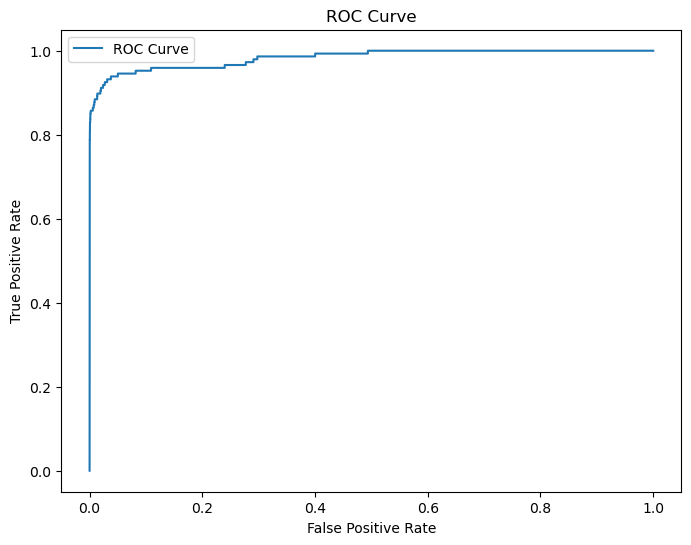

In [94]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

#Model Validation
print("Logistic Regression Evaluation:")
evaluate_model(lr, X_test_pt, y_test)

**Creating DecisionTreeClassifier Model**

In [95]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Decision Tree Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.42      0.74      0.54       147

    accuracy                           1.00     85443
   macro avg       0.71      0.87      0.77     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
[[85147   149]
 [   38   109]]
ROC-AUC Score: 0.8698748703195402


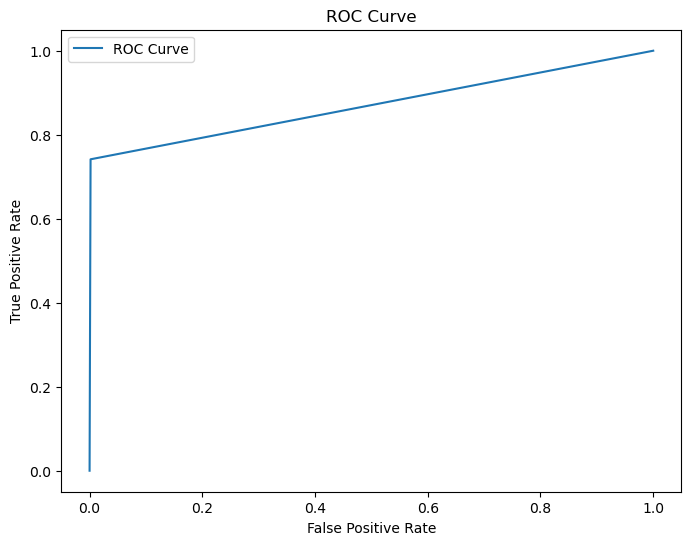

In [96]:
#Model Validation
print("Decision Tree Evaluation:")
evaluate_model(dt, X_test_pt, y_test)

**Creating XGBClassifier Model**

C:\Users\Hema\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:20:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.74      0.80      0.77       147

    accuracy                           1.00     85443
   macro avg       0.87      0.90      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
[[85254    42]
 [   29   118]]
ROC-AUC Score: 0.9604812357319593


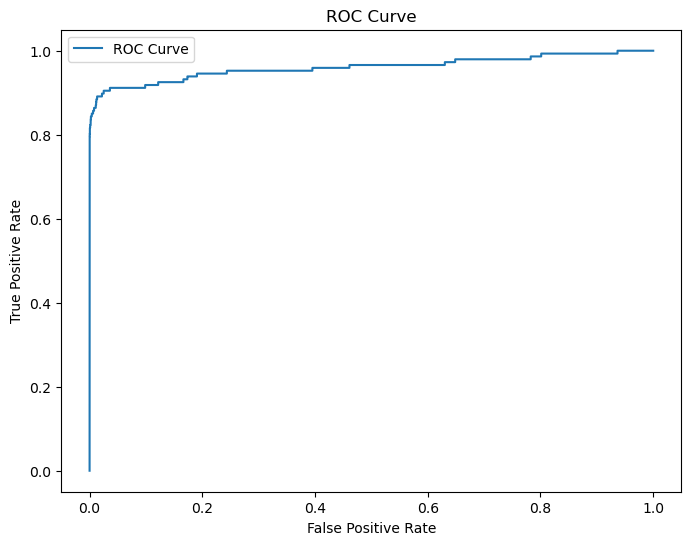

In [97]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

#Model Validation
print("XGBoost Evaluation:")
evaluate_model(xgb, X_test_pt, y_test)

In [98]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix

def get_model_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    return f1, accuracy, auc_roc, precision, recall


In [99]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train and evaluate each model, storing the results
model_summary = []

for name, model in models.items():
    model.fit(X_train, y_train)
    f1, accuracy, auc_roc, precision, recall = get_model_metrics(model, X_test_pt, y_test)
    model_summary.append([name, f1, accuracy, auc_roc, precision, recall])

# Create a DataFrame for model summary
model_summary_df = pd.DataFrame(model_summary, columns=['Name', 'F1_score', 'Accuracy', 'AUC_ROC', 'Precision', 'Recall'])

C:\Users\Hema\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:21:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [100]:
model_summary_df = model_summary_df.reset_index(drop=True)
display(model_summary_df)

,Name,F1_score,Accuracy,AUC_ROC,Precision,Recall
0,Logistic Regression,0.035492,0.910946,0.983147,0.018083,0.952381
1,Decision Tree,0.538272,0.997811,0.869875,0.422481,0.741497
2,XGBoost,0.768730,0.999169,0.960481,0.737500,0.802721


**Classification Report for Logistic Regression, Decision Tree, XGBoost Models**

In [101]:
# Evaluation and Classification Reports
print("Logistic Regression - Classification Report")
print(classification_report(y_test, lr.predict(X_test_pt)))


# Decision Tree
print("Decision Tree Evaluation - Classification Report")
print(classification_report(y_test, dt.predict(X_test_pt)))

# XGBoost
print("XGBoost - Classification Report")
print(classification_report(y_test, xgb.predict(X_test_pt)))

Logistic Regression - Classification Report
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     85296
           1       0.02      0.95      0.04       147

    accuracy                           0.91     85443
   macro avg       0.51      0.93      0.49     85443
weighted avg       1.00      0.91      0.95     85443

Decision Tree Evaluation - Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.42      0.74      0.54       147

    accuracy                           1.00     85443
   macro avg       0.71      0.87      0.77     85443
weighted avg       1.00      1.00      1.00     85443

XGBoost - Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.74      0.80      0.77       147

    accuracy                           1.00     85443
   

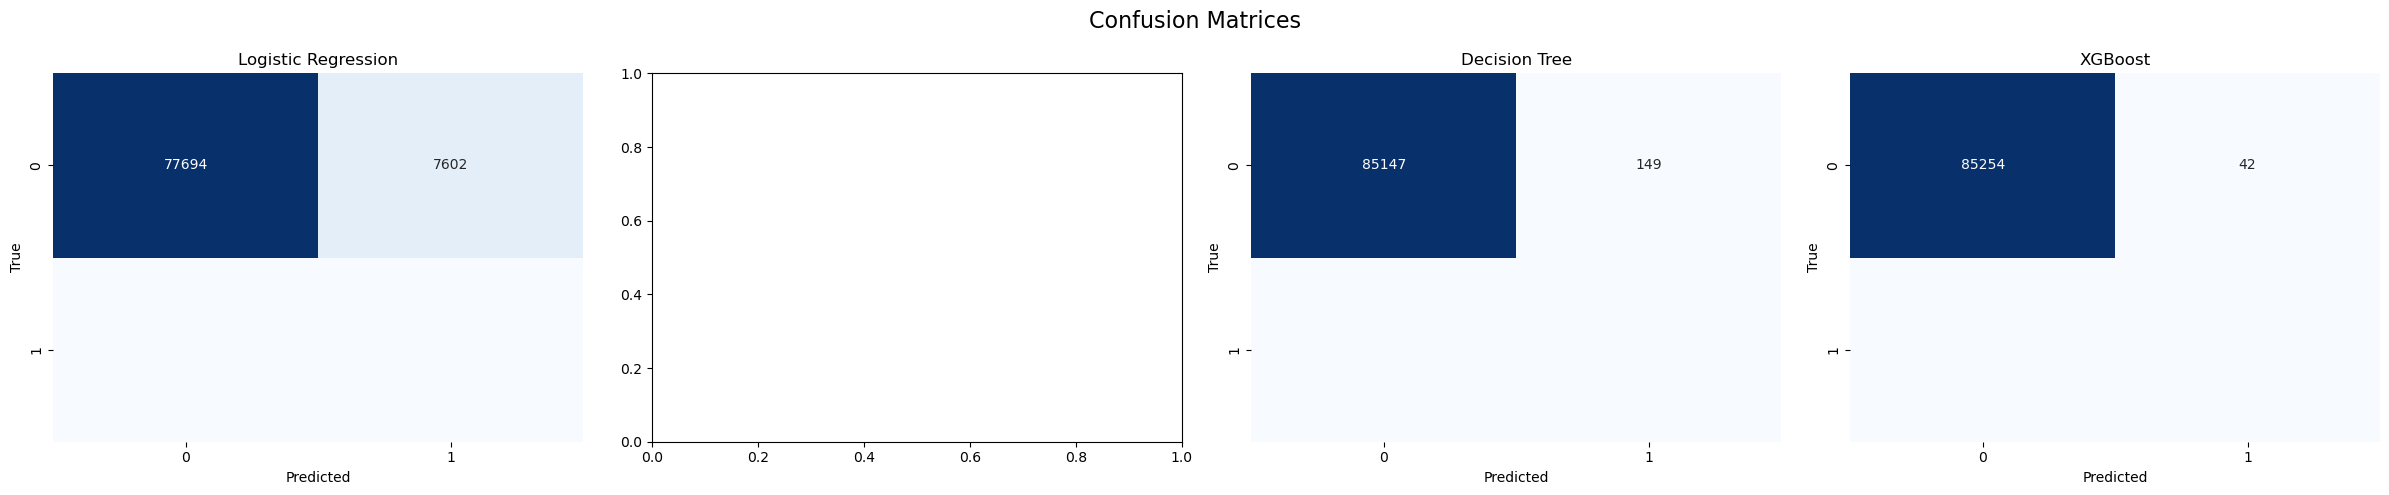

In [102]:
# Confusion matrices
# Logistic Regression
lr_pred = lr.predict(X_test_pt)
lr_cm = confusion_matrix(y_test, lr_pred)

# DT
dt_pred = dt.predict(X_test_pt)
dt_cm = confusion_matrix(y_test, dt_pred)

# XGBoost
xgb_pred = xgb.predict(X_test_pt)
xgb_cm = confusion_matrix(y_test, xgb_pred)

# Plotting confusion matrices
fig, axes = plt.subplots(1, 4, figsize=(24, 5))
fig.suptitle('Confusion Matrices', fontsize=16)

# Logistic Regression
sns.heatmap(lr_cm, annot=True, cmap='Blues', fmt='d', cbar=False, ax=axes[0])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

#dt
sns.heatmap(dt_cm, annot=True, cmap='Blues', fmt='d', cbar=False, ax=axes[2])
axes[2].set_title('Decision Tree')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

# XGBoost
sns.heatmap(xgb_cm, annot=True, cmap='Blues', fmt='d', cbar=False, ax=axes[3])
axes[3].set_title('XGBoost')
axes[3].set_xlabel('Predicted')
axes[3].set_ylabel('True')

plt.tight_layout()
plt.show()

In [103]:
from sklearn.metrics import confusion_matrix

# Assuming you have computed confusion matrices: lr_cm, knn_cm, xgb_cm

# Function to calculate metrics
def calculate_metrics(cm):
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]

    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    FPR = FP / (FP + TN)
    PPV = TP / (TP + FP)
    NPV = TN / (TN + FN)

    return sensitivity, specificity, FPR, PPV, NPV

# Calculate metrics for Logistic Regression
lr_sensitivity, lr_specificity, lr_fpr, lr_ppv, lr_npv = calculate_metrics(lr_cm)

# Calculate metrics for Decision Tree
dt_sensitivity, dt_specificity, dt_fpr, dt_ppv, dt_npv = calculate_metrics(dt_cm)

# Calculate metrics for XGBoost
xgb_sensitivity, xgb_specificity, xgb_fpr, xgb_ppv, xgb_npv = calculate_metrics(xgb_cm)

# Print metrics for each model
print("Logistic Regression Metrics:")
print(f"Sensitivity: {lr_sensitivity:.4f}, Specificity: {lr_specificity:.4f}, FPR: {lr_fpr:.4f}, PPV: {lr_ppv:.4f}, NPV: {lr_npv:.4f}")

print("\nDecision Tree Metrics:")
print(f"Sensitivity: {dt_sensitivity:.4f}, Specificity: {dt_specificity:.4f}, FPR: {dt_fpr:.4f}, PPV: {dt_ppv:.4f}, NPV: {dt_npv:.4f}")

print("\nXGBoost Metrics:")
print(f"Sensitivity: {xgb_sensitivity:.4f}, Specificity: {xgb_specificity:.4f}, FPR: {xgb_fpr:.4f}, PPV: {xgb_ppv:.4f}, NPV: {xgb_npv:.4f}")


Logistic Regression Metrics:
Sensitivity: 0.9524, Specificity: 0.9109, FPR: 0.0891, PPV: 0.0181, NPV: 0.9999

Decision Tree Metrics:
Sensitivity: 0.7415, Specificity: 0.9983, FPR: 0.0017, PPV: 0.4225, NPV: 0.9996

XGBoost Metrics:
Sensitivity: 0.8027, Specificity: 0.9995, FPR: 0.0005, PPV: 0.7375, NPV: 0.9997


#ROC - Curves for all the models

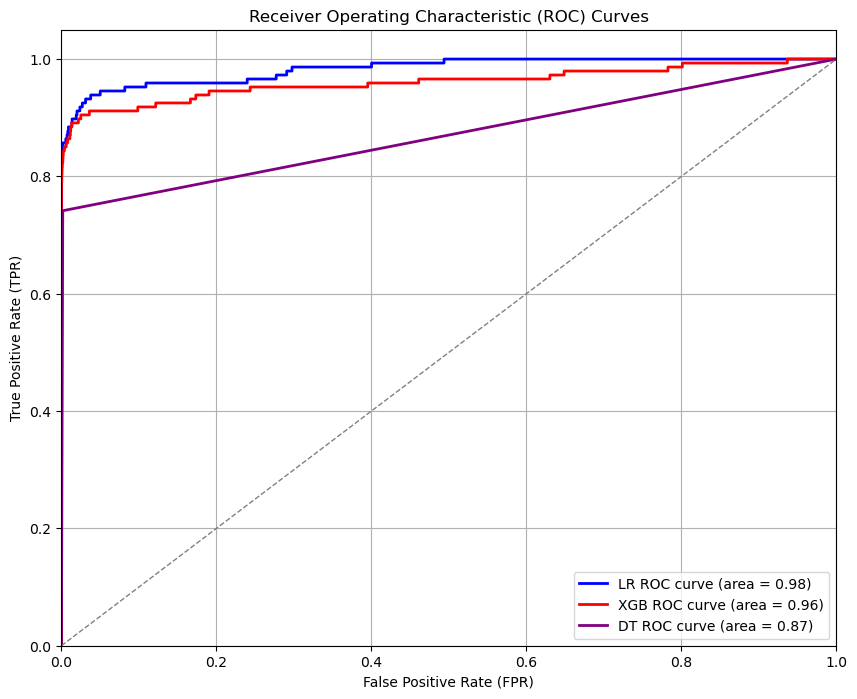

In [104]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix,auc

# Initialize models
lr = LogisticRegression(max_iter=1000, random_state=42)
xgb = XGBClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)

# Fit models
lr.fit(X_train, y_train)
xgb.fit(X_train, y_train)
dt.fit(X_train, y_train)

# Predict probabilities for ROC curve
lr_probs = lr.predict_proba(X_test)[:, 1]
xgb_probs = xgb.predict_proba(X_test)[:, 1]
dt_probs = dt.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_roc_auc = auc(lr_fpr, lr_tpr)

xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
dt_roc_auc = auc(dt_fpr, dt_tpr)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(lr_fpr, lr_tpr, color='blue', lw=2, label=f'LR ROC curve (area = {lr_roc_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, color='red', lw=2, label=f'XGB ROC curve (area = {xgb_roc_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, color='purple', lw=2, label=f'DT ROC curve (area = {dt_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Hyperparameter Tuning for Logistic Model**

Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Tuned Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     85296
           1       0.02      0.95      0.04       147

    accuracy                           0.91     85443
   macro avg       0.51      0.93      0.49     85443
weighted avg       1.00      0.91      0.95     85443

Confusion Matrix:
[[77696  7600]
 [    7   140]]
ROC-AUC Score: 0.9831344819863792


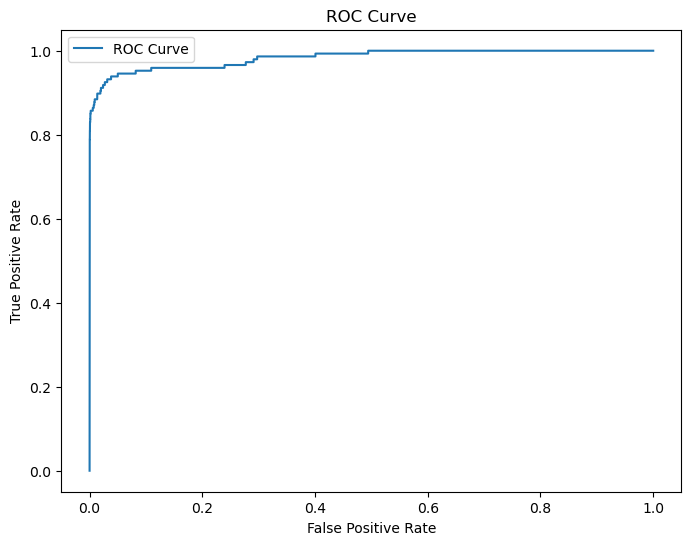

In [105]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_lr, cv=5, scoring='roc_auc')
grid_lr.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", grid_lr.best_params_)
best_lr = grid_lr.best_estimator_
print("Tuned Logistic Regression Evaluation:")
evaluate_model(best_lr, X_test_pt, y_test)

**Hyperparameter Tuning for Decision Tree**

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for Decision Tree
dt_param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
dt_grid_search = GridSearchCV(estimator=dt, param_grid=dt_param_grid,
                              cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Fit the model
dt_grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_dt = dt_grid_search.best_estimator_
print(f"Best Parameters for Decision Tree: {dt_grid_search.best_params_}")
print(f"Best Score for Decision Tree: {dt_grid_search.best_score_}")

# Evaluate the best model on the test set
dt_best_pred = best_dt.predict(X_test_pt)
print(classification_report(y_test, dt_best_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score for Decision Tree: 0.9201239269452645
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     85296
           1       0.03      0.85      0.06       147

    accuracy                           0.95     85443
   macro avg       0.52      0.90      0.52     85443
weighted avg       1.00      0.95      0.97     85443



**Hyperparameter Tuning for XGBoost**

In [107]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.3, 0.7, 1.0],
    'subsample': [0.7, 1.0]
}

# Initialize the XGBClassifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV
xgb_grid_search = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid,
                               cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Fit the model
xgb_grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_xgb = xgb_grid_search.best_estimator_
print(f"Best Parameters for XGBoost: {xgb_grid_search.best_params_}")
print(f"Best Score for XGBoost: {xgb_grid_search.best_score_}")

# Evaluate the best model on the test set
xgb_best_pred = best_xgb.predict(X_test_pt)
print(classification_report(y_test, xgb_best_pred))

Fitting 5 folds for each of 162 candidates, totalling 810 fits


C:\Users\Hema\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:57:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for XGBoost: {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.7}
Best Score for XGBoost: 0.9644590738077806
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.77      0.81      0.79       147

    accuracy                           1.00     85443
   macro avg       0.89      0.90      0.90     85443
weighted avg       1.00      1.00      1.00     85443



#Model Deployment


In [108]:
import joblib

# Save the model
joblib.dump(best_xgb, 'best_model_xgb.pkl')
joblib.dump(best_dt, 'best_model_dt.pkl')

['best_model_dt.pkl']

In [109]:
import joblib

# Save the model
joblib.dump(best_xgb, 'best_model_xgb.pkl')

['best_model_xgb.pkl']

Loaded XGBoost Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.77      0.81      0.79       147

    accuracy                           1.00     85443
   macro avg       0.89      0.90      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
[[85261    35]
 [   28   119]]
ROC-AUC Score: 0.9654419120865377


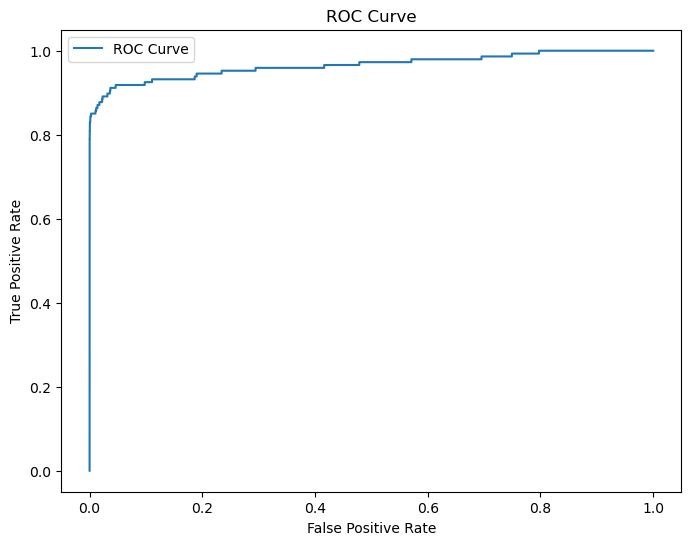


Loaded Decision Tree Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     85296
           1       0.03      0.85      0.06       147

    accuracy                           0.95     85443
   macro avg       0.52      0.90      0.52     85443
weighted avg       1.00      0.95      0.97     85443

Confusion Matrix:
[[81411  3885]
 [   22   125]]
ROC-AUC Score: 0.9202957655581459


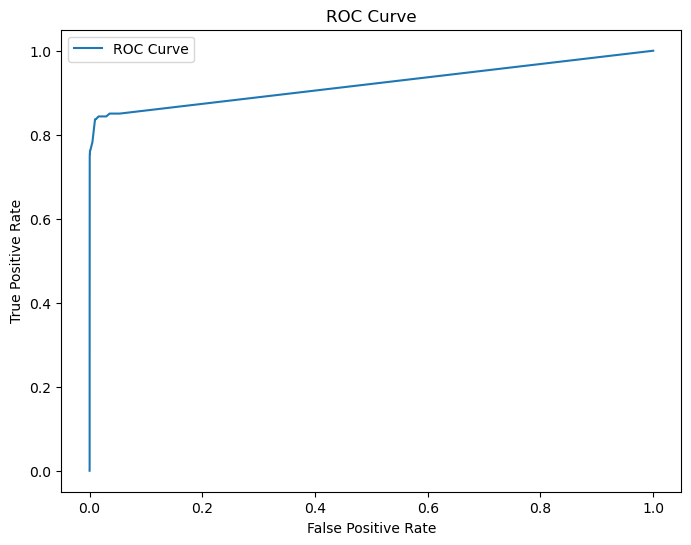

In [110]:
# Load the model
loaded_xgb = joblib.load('best_model_xgb.pkl')
loaded_dt = joblib.load('best_model_dt.pkl')

# Make predictions
new_predictions_xgb = loaded_xgb.predict(X_test)
new_predictions_dt = loaded_dt.predict(X_test)

# Evaluate loaded models
print("Loaded XGBoost Model Evaluation:")
evaluate_model(loaded_xgb, X_test, y_test)

print("\nLoaded Decision Tree Model Evaluation:")
evaluate_model(loaded_dt, X_test, y_test)

In [111]:
import pickle
from xgboost import XGBClassifier
from sklearn.datasets import load_iris

In [112]:
# Initialize and train the model
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [113]:
# Save the model to a file
with open('best_model_xgb.pkl', 'wb') as file:
    pickle.dump(model, file)

In [114]:
# Later on, load the model from the file
with open('best_model_xgb.pkl', 'rb') as file:
    best_xgb = pickle.load(file)


In [116]:
# Use the loaded model to make predictions
predictions = best_xgb.predict(X_test)

In [117]:
# Print the predictions
print(predictions)

[0 0 0 ... 0 0 0]
